<a href="https://colab.research.google.com/github/AndreySamoylenko15/API_Wizards/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, header=0, thousands='.', decimal=',')

if len(tables) > 12:
    df = tables[12]
    print(df.head(35))
    rows, cols = df.shape
    data = pd.DataFrame(df)
    print(f"Вибрана таблиця має {rows} рядків і {cols} стовпців.")
else:
    print("Таблиці з індексом 12 не існує.")
#Вивести перші рядки таблиці за допомогою методу head
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)




               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [2]:
df.dtypes #Визначте типи всіх стовпців за допомогою dataframe.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [3]:
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)
df = df.fillna(df.mean(numeric_only=True), axis=0)
print(df)
print(df.dtypes)
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

               Регіон       1950       1960       1970  1990  2000  2012  \
0                Крим  23.000000  20.600000  16.000000  13.0   7.3  12.6   
1           Вінницька  22.400000  19.200000  14.200000  12.4   8.4  11.2   
2           Волинська  24.700000  25.000000  17.900000  15.3  11.2  14.8   
3    Дніпропетровська  20.400000  20.400000  15.100000  12.3   7.1  11.2   
4            Донецька  27.100000  21.400000  14.000000  10.9   6.1   9.8   
5         Житомирська  26.100000  22.300000  15.900000  12.9   8.9  12.2   
6        Закарпатська  31.400000  27.300000  20.700000  16.8  11.5  15.1   
7          Запорізька  21.900000  19.700000  15.000000  12.4   7.1  10.6   
8   Івано-Франківська  24.300000  24.800000  18.200000  15.5  10.3  12.4   
9            Київська  20.400000  18.900000  15.600000  12.3   7.3  12.2   
10     Кіровоградська  21.600000  17.100000  14.500000  12.6   7.9  11.0   
11          Луганська  26.200000  23.500000  14.400000  11.6   6.2   9.6   
12          

In [4]:
df.isnull().sum() / len(df) #Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64

In [5]:
df = df.drop(df.index[-1], axis=0) #Видаліть з таблиці дані по всій країні, останній рядок таблиці
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,—,—
1,Вінницька,22.400000,19.200000,14.200000,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.400000,20.400000,15.100000,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,8.2,—
5,Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.900000,19.700000,15.000000,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.2,8.8
9,Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,12.1,8.0


from matplotlib import pyplot as plt
df['1950'].plot(kind='hist', bins=20, title='1950')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['1960'].plot(kind='hist', bins=20, title='1960')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['1970'].plot(kind='hist', bins=20, title='1970')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['1990'].plot(kind='hist', bins=20, title='1990')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='1950', y='1960', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='1960', y='1970', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='1970', y='1990', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='1990', y='2000', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['1950'].plot(kind='line', figsize=(8, 4), title='1950')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['1960'].plot(kind='line', figsize=(8, 4), title='1960')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['1970'].plot(kind='line', figsize=(8, 4), title='1970')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['1990'].plot(kind='line', figsize=(8, 4), title='1990')
plt.gca().spines[['top', 'right']].set_visible(False)

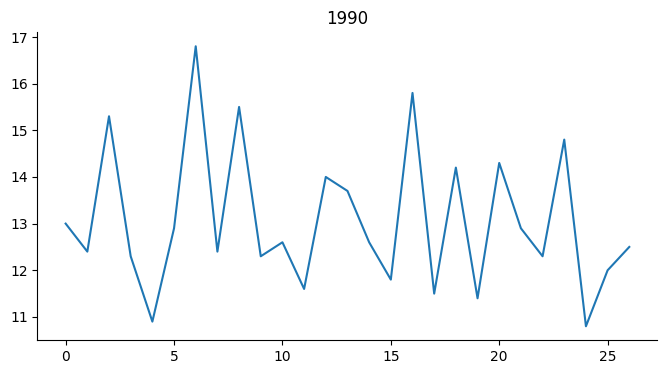

In [8]:
df['1990'].plot(kind='line', figsize=(8, 4), title='1990')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df.describe()

,1950,1960,1970,1990,2000,2012
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,23.103134,20.757339,15.599451,13.059259,8.222222,11.655556
std,2.766627,2.935614,1.868774,1.554462,1.584379,1.666718
min,18.600000,16.300000,12.700000,10.800000,6.100000,9.400000
25%,21.200000,18.650000,14.400000,12.150000,7.050000,10.300000
50%,23.000000,20.400000,15.500000,12.600000,7.900000,11.500000
75%,24.500000,22.050000,16.300000,14.100000,9.000000,12.300000
max,31.400000,27.300000,20.700000,16.800000,11.800000,15.900000


from matplotlib import pyplot as plt
_df_0['1950'].plot(kind='hist', bins=20, title='1950')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['1960'].plot(kind='hist', bins=20, title='1960')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['1970'].plot(kind='hist', bins=20, title='1970')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['1990'].plot(kind='hist', bins=20, title='1990')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='1950', y='1960', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='1960', y='1970', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='1970', y='1990', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='1990', y='2000', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['1950'].plot(kind='line', figsize=(8, 4), title='1950')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['1960'].plot(kind='line', figsize=(8, 4), title='1960')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['1970'].plot(kind='line', figsize=(8, 4), title='1970')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['1990'].plot(kind='line', figsize=(8, 4), title='1990')
plt.gca().spines[['top', 'right']].set_visible(False)

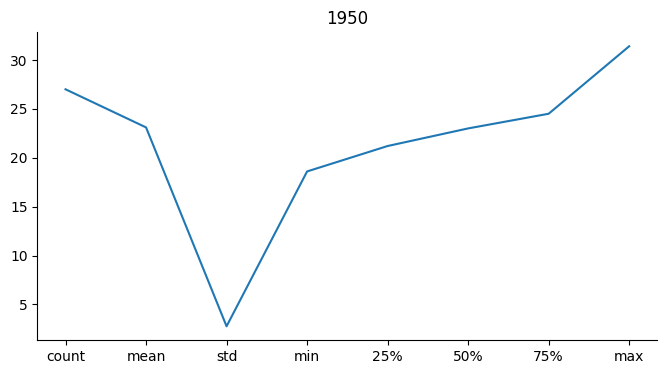

In [14]:
from matplotlib import pyplot as plt
_df_8['1950'].plot(kind='line', figsize=(8, 4), title='1950')
plt.gca().spines[['top', 'right']].set_visible(False)

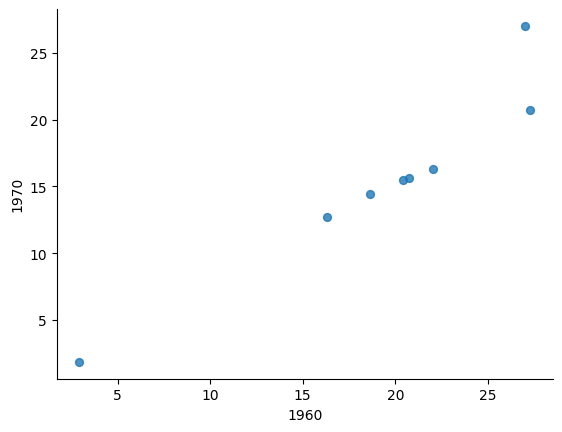

In [9]:

_df_5.plot(kind='scatter', x='1960', y='1970', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg = df['2012'].mean()
df.loc[df['2012'] > avg]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,—,—
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.1,10.1
5,Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.2,8.8
9,Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,12.1,8.0
12,Львівська,23.400000,24.000000,17.100000,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100000,19.200000,14.800000,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900000,26.700000,19.300000,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800000,21.400000,16.600000,14.3,8.5,11.7,11.5,8.1


In [ ]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_burn = df['2014'].max()
region_with_max_birth_rate = df[df['2014'] == max_burn].iloc[0, 0]
print(f'Регіон з найвищою народжуваністю у 2014 році: {region_with_max_birth_rate}')


In [ ]:
!pip install seaborn

In [ ]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt



regions = df['Регіон']
birth_rates_2019 = df['2019']
plt.figure(figsize=(10, 6))
plt.bar(regions, birth_rates_2019, color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('2019 році')
plt.title('2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()